In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from spread_train import *
import pickle
import time

In [2]:
with open('dict_data_final.pkl', 'rb') as f:
    dict_data_final = pickle.load(f)

In [3]:
df, y = dict_data_final['Beneixama']

for a , b in np.argwhere(y[:, :, 0] == 1):
    print(a, b)

101 97
101 98


In [4]:
y.shape

(257, 257, 9)

In [5]:
grid = Grid(x=df, y=y)
grid.initialize(part=[0.01, 0.2, 0.3])
grid.submatrix()
grid.enlargement_process()
grid.montecarlo(n_it=100)

<AxesSubplot:>

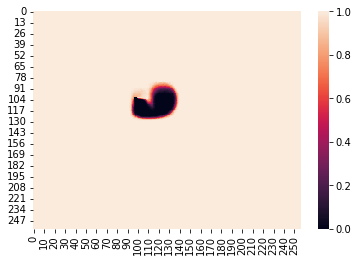

In [6]:
sns.heatmap(grid.X0[:, :, -1])

<AxesSubplot:>

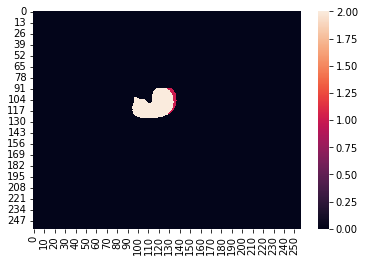

In [7]:
sns.heatmap(grid.X[:, :, -1])

<AxesSubplot:>

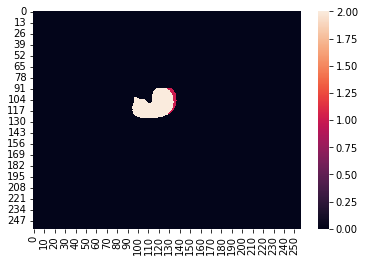

In [8]:
_, X = torch.max(
    torch.stack((grid.X0, grid.X1, grid.X2), dim=-1),
    dim=-1
)
sns.heatmap(X[:, :, -1])

In [9]:
X[a, b, -1]

tensor(2)

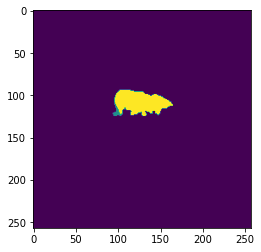

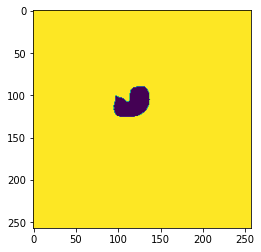

In [10]:
plt.imshow(y[:, :, -1])
plt.show()
plt.imshow(X[:, :, -1]==0)
plt.show()

Artana
Elapsed time to get the results:      47.90975069999695
Number of iterations (K, n_it):                91 100


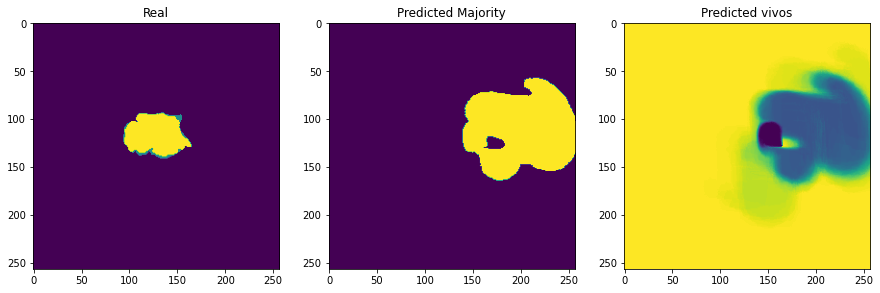

Beneixama
Elapsed time to get the results:      7.037302494049072
Number of iterations (K, n_it):                17 100


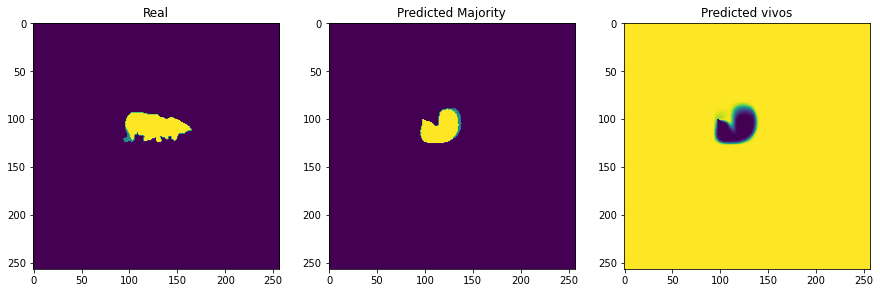

Beniarda
Elapsed time to get the results:      24.83171844482422
Number of iterations (K, n_it):                44 100


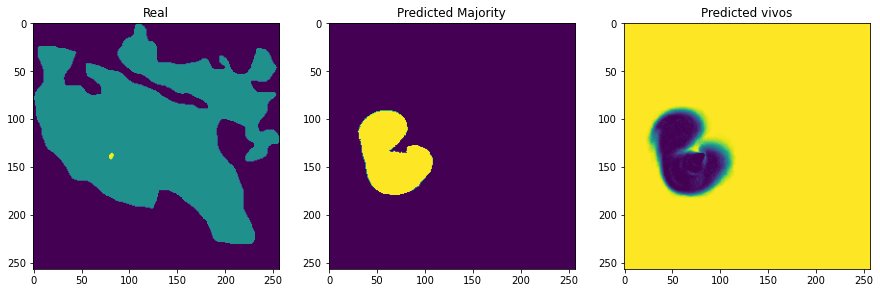

Bolulla
Elapsed time to get the results:      35.628897190093994
Number of iterations (K, n_it):                98 100


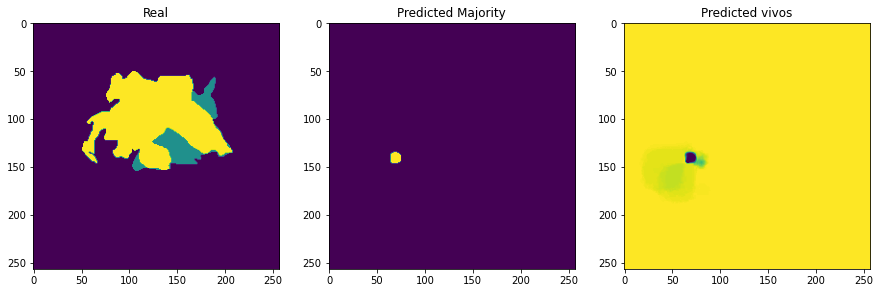

Carcaixent
Elapsed time to get the results:      43.455987215042114
Number of iterations (K, n_it):                81 100


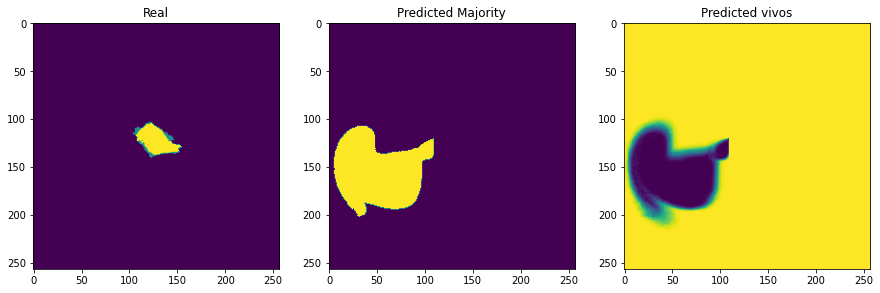

Chella
Elapsed time to get the results:      48.19340634346008
Number of iterations (K, n_it):                75 100


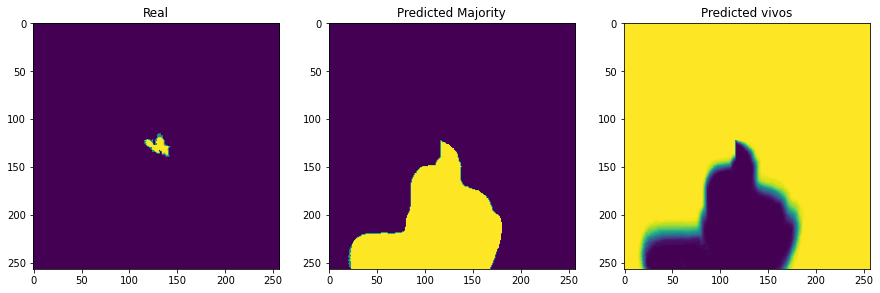

Gatova
Elapsed time to get the results:      56.437567949295044
Number of iterations (K, n_it):                88 100


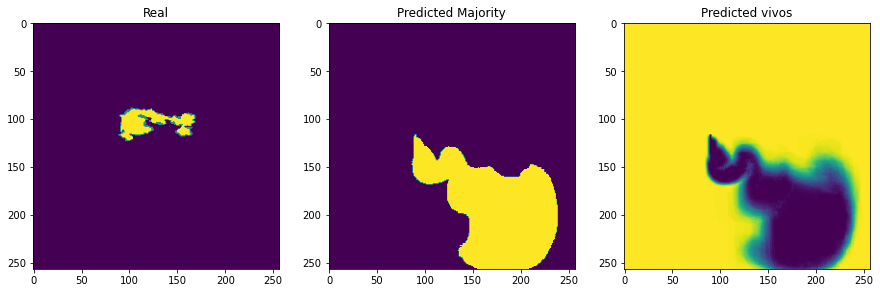

Llutxent
Elapsed time to get the results:      53.37348818778992
Number of iterations (K, n_it):                108 100


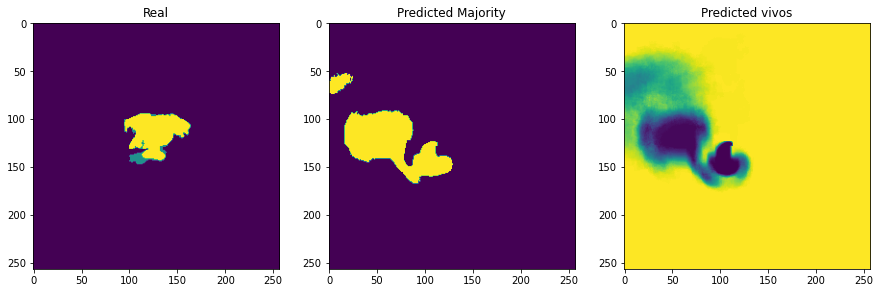

Montan
Elapsed time to get the results:      51.89149737358093
Number of iterations (K, n_it):                131 100


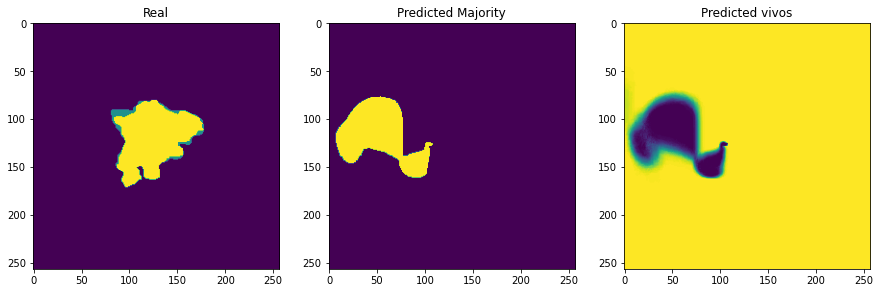

ValldEbo
Elapsed time to get the results:      23.270888090133667
Number of iterations (K, n_it):                43 100


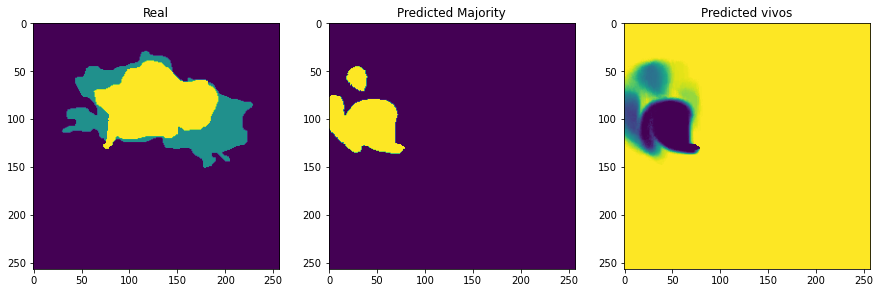

VallGallinera
Elapsed time to get the results:      57.97599792480469
Number of iterations (K, n_it):                104 100


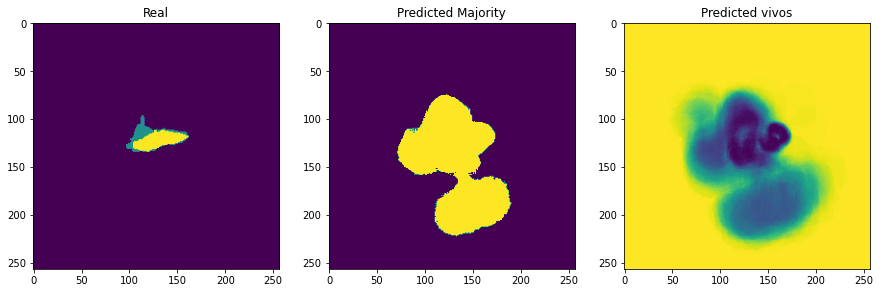

Elapsed time to get ALL the results:      452.17145466804504


In [11]:
t_ini = time.time()

for name in dict_data_final.keys():
    print(name)
    t0 = time.time()

    x, y = dict_data_final[name]
    grid = Grid(x=x, y=y)
    grid.initialize(part=[0.01, 0.2, 0.4])
    grid.submatrix()
    grid.enlargement_process()
    grid.montecarlo(n_it=100)

    tf = time.time()

    print('Elapsed time to get the results:     ',tf-t0)
    print('Number of iterations (K, n_it):               ',grid.K, 100)
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(y[:, :, -1])
    ax[0].set_title('Real')
    ax[1].imshow(grid.X[:, :, -1])
    ax[1].set_title('Predicted Majority')
    ax[2].imshow(grid.X0[:, :, -1])
    ax[2].set_title('Predicted vivos')

    plt.show()
    #plt.imshow(y[:, :, -1])
    #plt.show()
    #plt.imshow(grid.X[:, :, -1])
    #plt.show()
    #plt.imshow(grid.X0[:, :, -1])
    #plt.show()

t_fin = time.time()

print('Elapsed time to get ALL the results:     ',t_fin-t_ini)

Artana
Elapsed time to get the results:      40.629993200302124
Number of iterations (K, n_it):                91 100
Beneixama
Elapsed time to get the results:      8.119107961654663
Number of iterations (K, n_it):                17 100
Beniarda
Elapsed time to get the results:      20.405672788619995
Number of iterations (K, n_it):                44 100
Bolulla
Elapsed time to get the results:      36.84101915359497
Number of iterations (K, n_it):                98 100
Carcaixent
Elapsed time to get the results:      37.07105755805969
Number of iterations (K, n_it):                81 100
Chella
Elapsed time to get the results:      41.595526933670044
Number of iterations (K, n_it):                75 100
Gatova
Elapsed time to get the results:      42.88965964317322
Number of iterations (K, n_it):                88 100
Llutxent
Elapsed time to get the results:      44.922067642211914
Number of iterations (K, n_it):                108 100
Montan
Elapsed time to get the results:      59

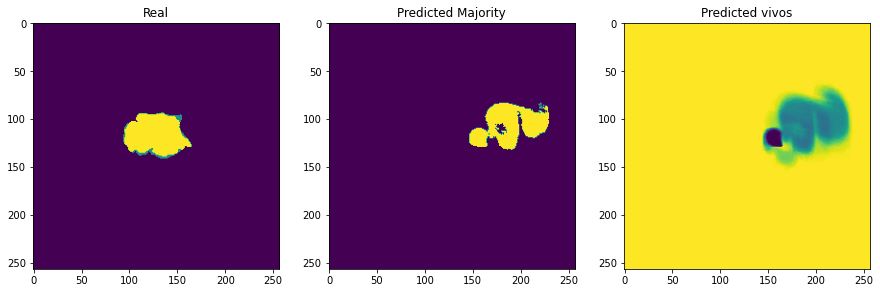

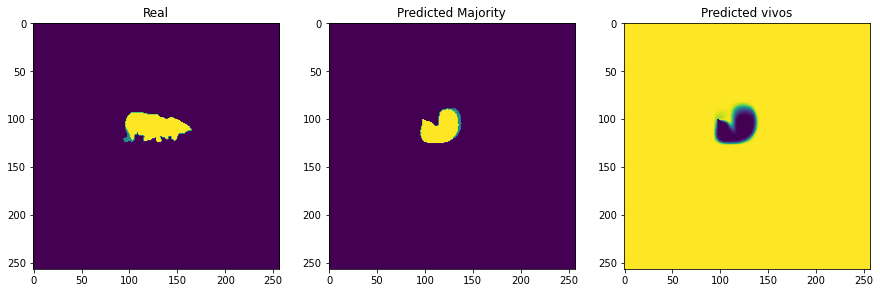

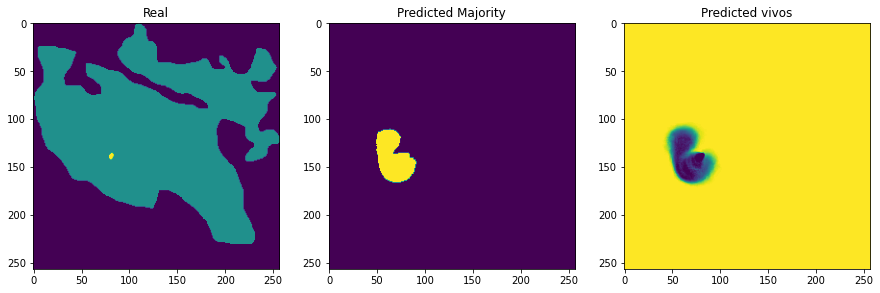

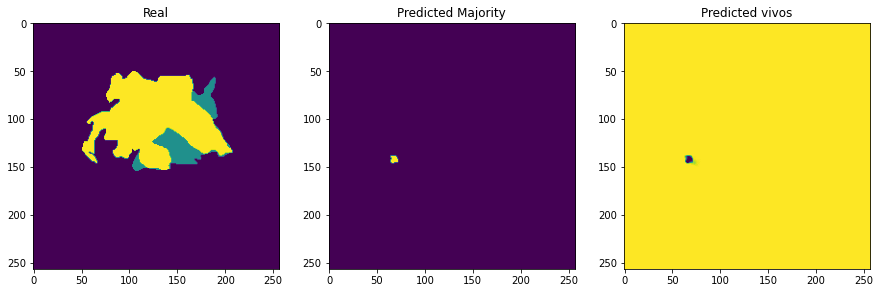

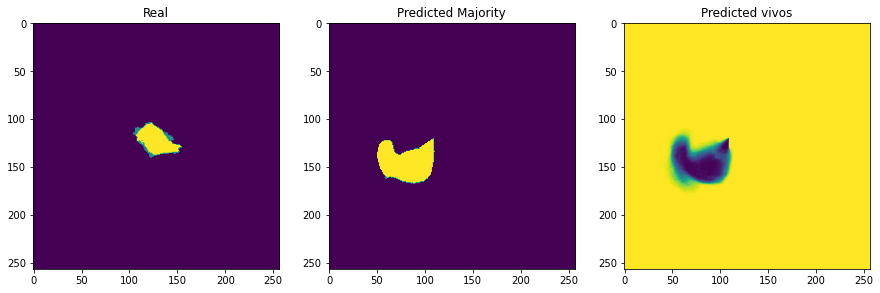

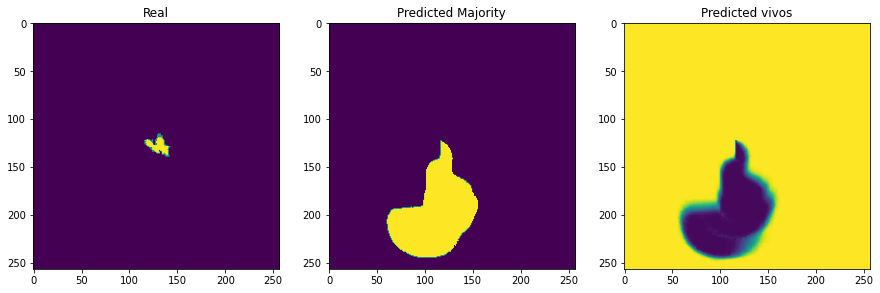

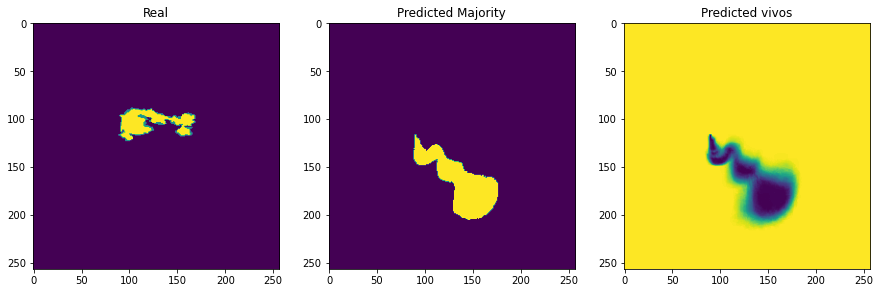

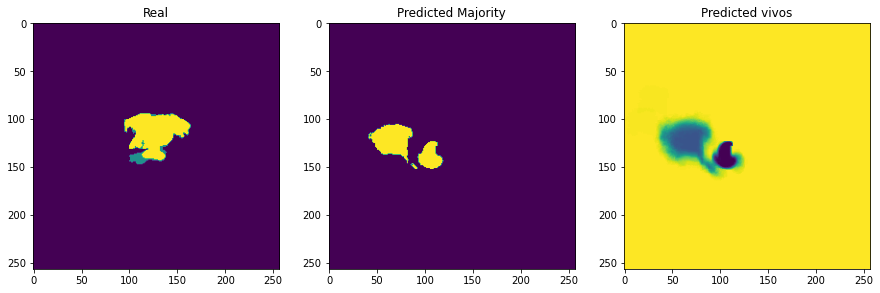

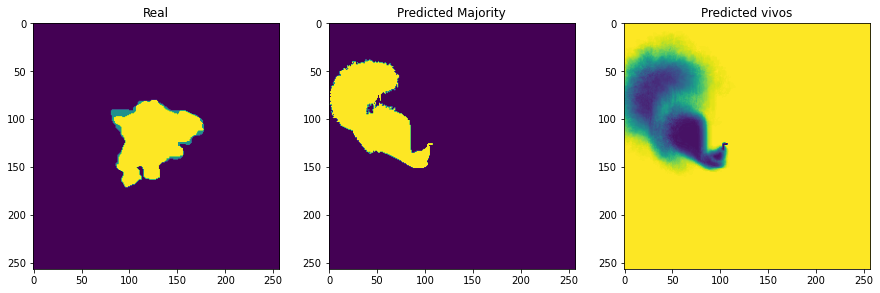

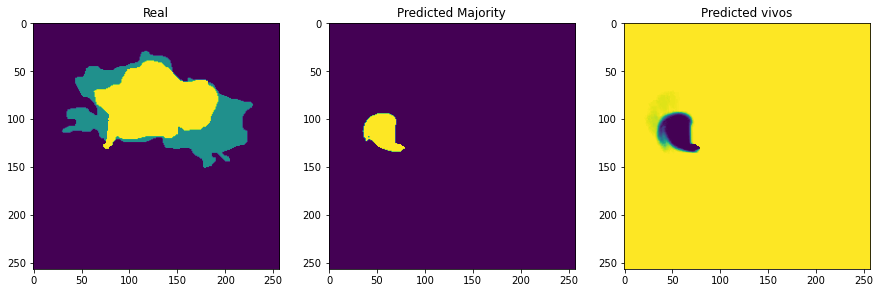

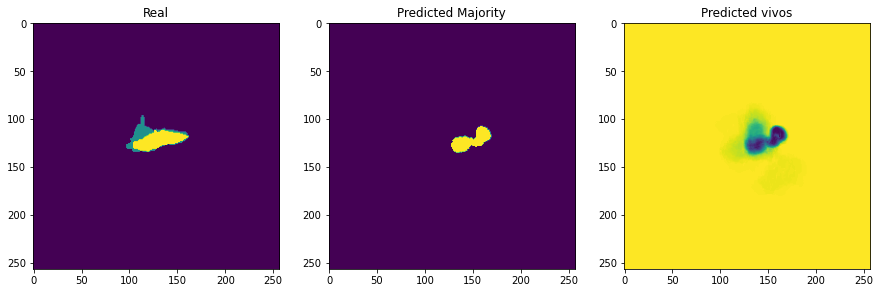

In [12]:
t_ini = time.time()

for name in dict_data_final.keys():
    print(name)
    t0 = time.time()

    x, y = dict_data_final[name]
    grid = Grid(x=x, y=y)
    grid.initialize(part=[0.1, 0.5, 0.9])
    grid.submatrix()
    grid.enlargement_process()
    grid.montecarlo(n_it=100)

    tf = time.time()

    print('Elapsed time to get the results:     ',tf-t0)
    print('Number of iterations (K, n_it):               ',grid.K, 100)
    
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(y[:, :, -1])
    ax[0].set_title('Real')
    ax[1].imshow(grid.X[:, :, -1])
    ax[1].set_title('Predicted Majority')
    ax[2].imshow(grid.X0[:, :, -1])
    ax[2].set_title('Predicted vivos')
    #plt.imshow(y[:, :, -1])
    #plt.show()
    #plt.imshow(grid.X[:, :, -1])
    #plt.show()
    #plt.imshow(grid.X0[:, :, -1])
    #plt.show()

t_fin = time.time()

print('Elapsed time to get ALL the results:     ',t_fin-t_ini)

data_Alzira


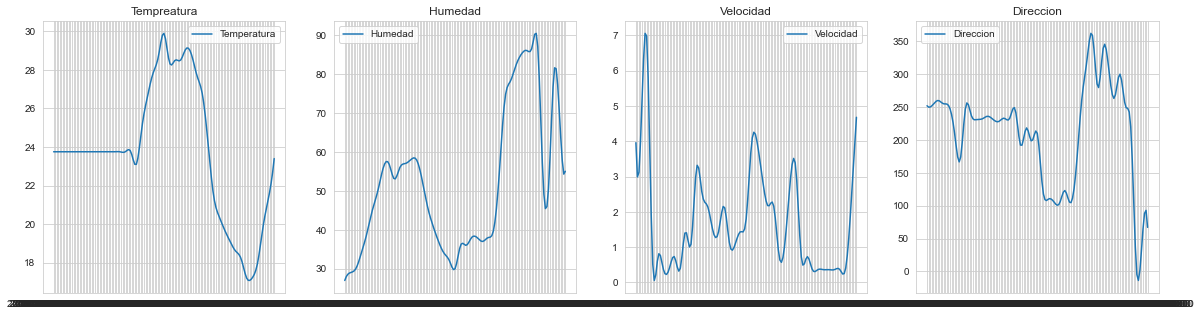

data_Artana


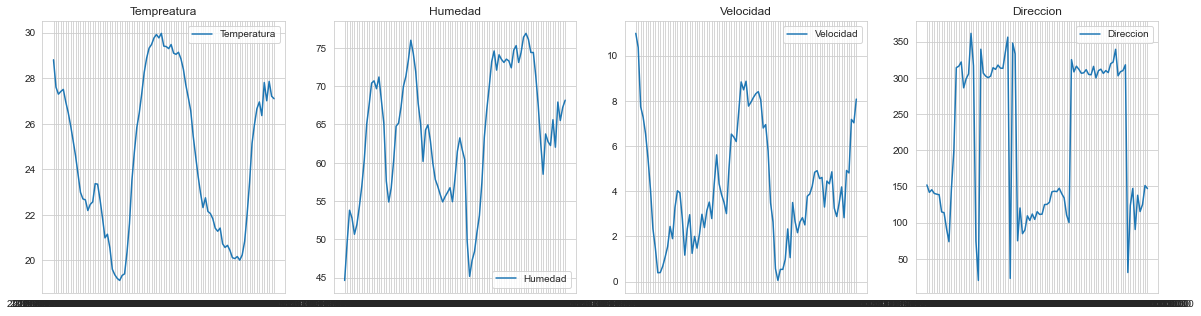

data_Beneixama


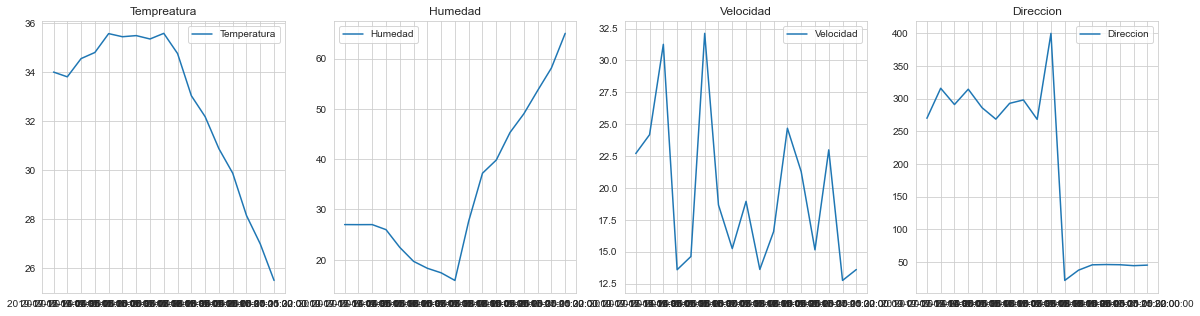

data_Beniarda


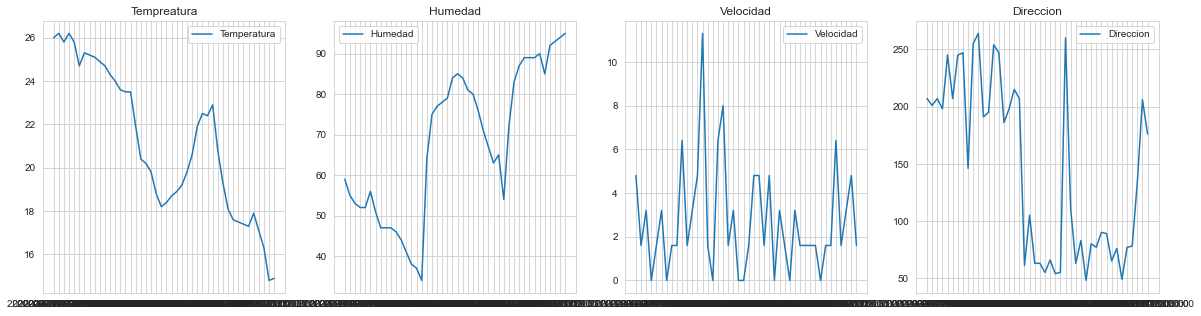

data_Bolulla


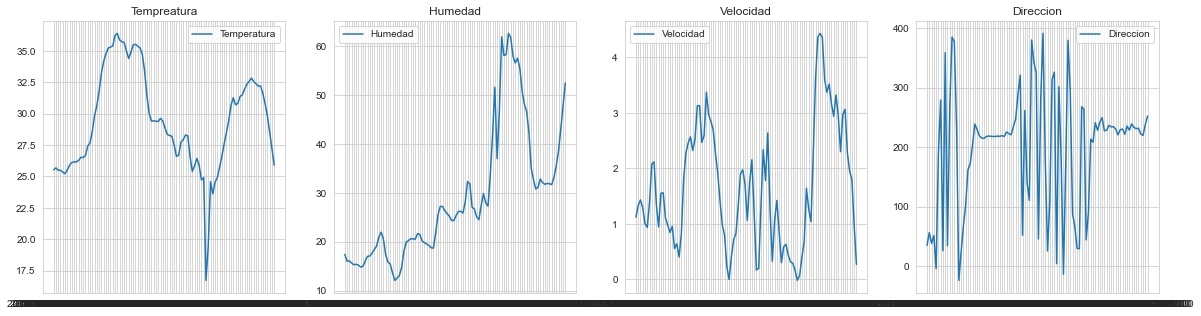

data_Carcaixent


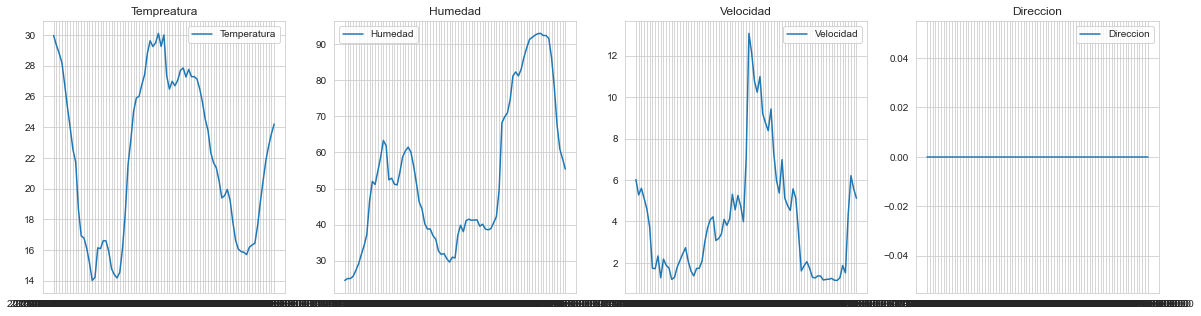

data_Carcaixent_2


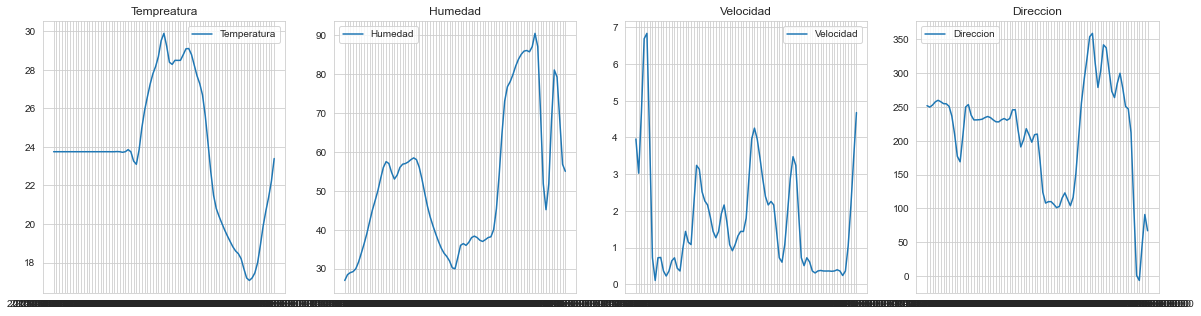

data_Chella


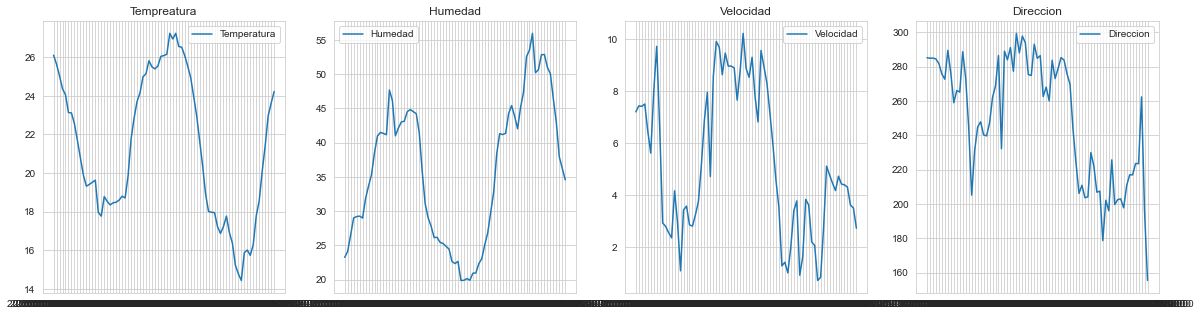

data_Gatova


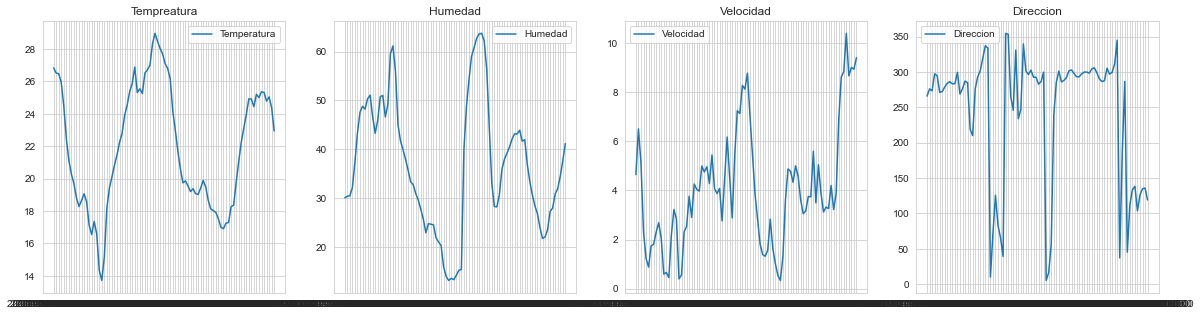

data_Llutxent


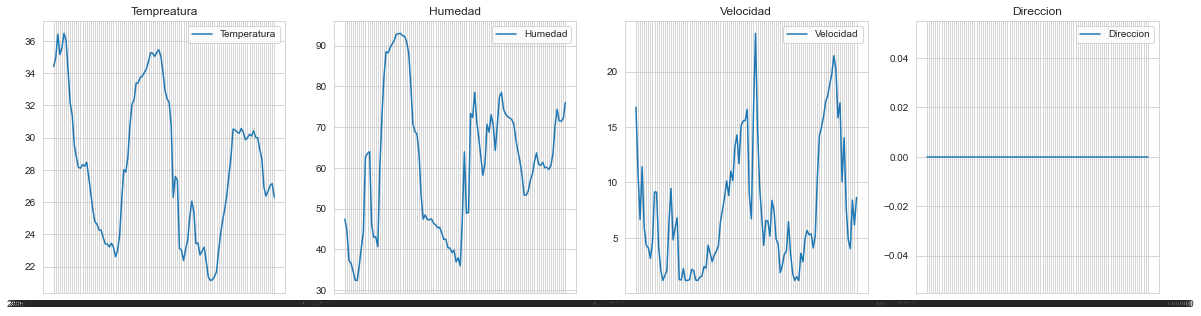

data_Llutxent_2


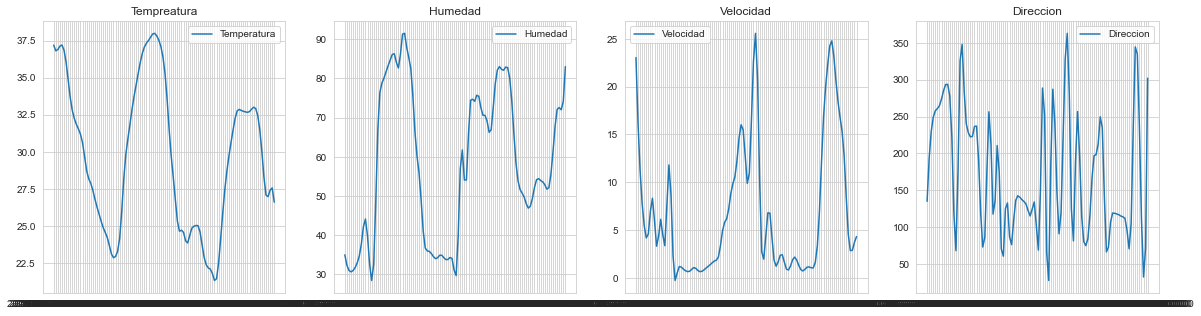

data_Montan


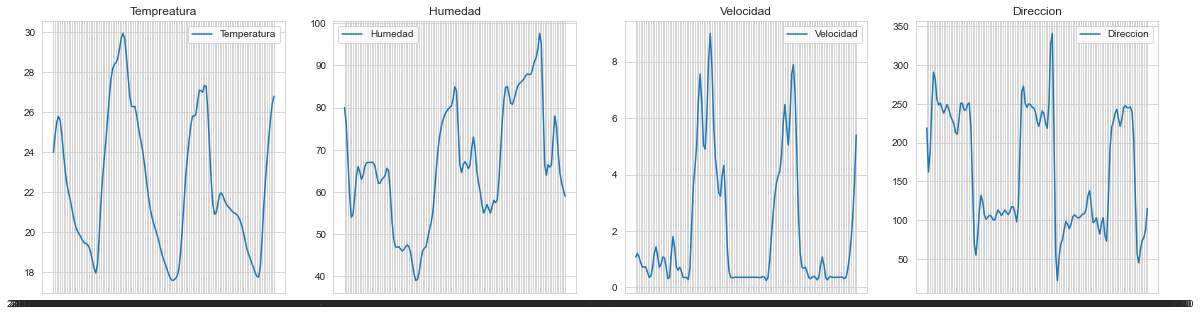

data_ValldEbo


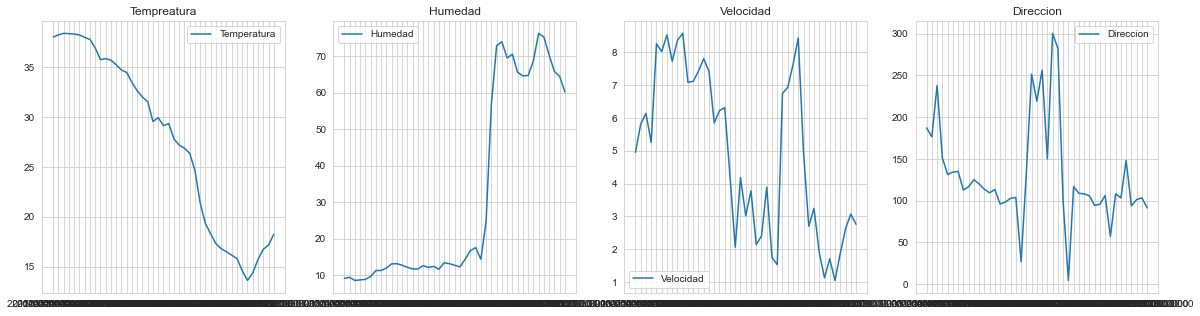

data_VallGallinera


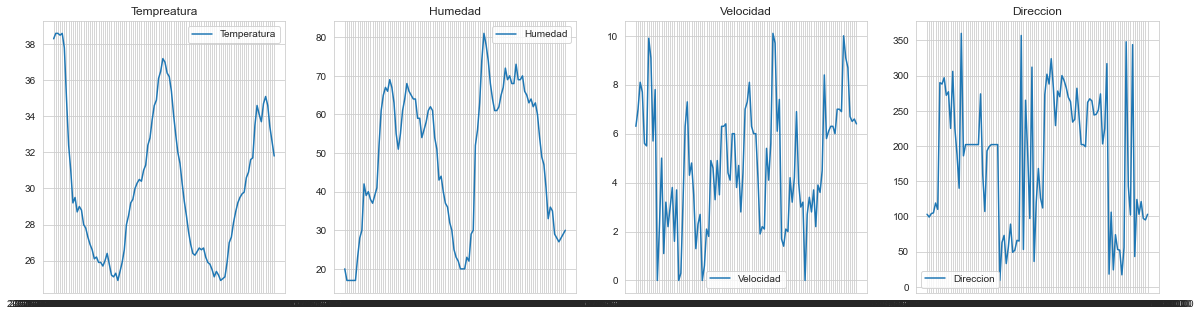

In [13]:
import os
path = 'C:\\Users\\joanb\\Desktop\\data_incendios\\clima\\process_data\\interpolated_data\\'
for name in os.listdir(path):
    print(name)

    x = pd.read_csv(path + name, index_col=0, sep=';', decimal='.')

    sns.set_style('whitegrid')
    
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))

    #x, y = dict_data_final[name]

    ax[0].plot(x['Temperatura'], label='Temperatura')
    ax[0].set_title('Tempreatura')
    ax[0].legend()

    ax[1].plot(x['Humedad'], label='Humedad')
    ax[1].set_title('Humedad')
    ax[1].legend()

    ax[2].plot(x['Velocidad'], label='Velocidad')
    ax[2].set_title('Velocidad')
    ax[2].legend()

    ax[3].plot(x['Direccion'], label='Direccion')
    ax[3].set_title('Direccion')
    ax[3].legend()

    plt.savefig('fig_' + name + '.png')
    plt.show()


In [14]:
alpha = torch.tensor(1, requires_grad=True, dtype=torch.float)
beta = torch.tensor(1, requires_grad=True, dtype=torch.float)
gamma = torch.tensor(1, requires_grad=True, dtype=torch.float)

def fun_p0_c(t, h, alpha, beta, gamma, t_min=0):
    x = gamma * ((h**beta) / ((t - t_min)**alpha))
    return torch.tensor(1/(1 + x)), torch.tensor(1 + x)